In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [15]:
try:
    X_train = pd.read_csv('X_train.csv')
    X_test = pd.read_csv('X_test.csv')
    y_train = pd.read_csv('y_train.csv').values.ravel() # .ravel() fixes the "column-vector" warning
    y_test = pd.read_csv('y_test.csv').values.ravel()
except FileNotFoundError:
    print('Error in loading the files')
    exit()

In [16]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 73.23%


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6863
           1       0.77      0.67      0.71      6866

    accuracy                           0.73     13729
   macro avg       0.74      0.73      0.73     13729
weighted avg       0.74      0.73      0.73     13729



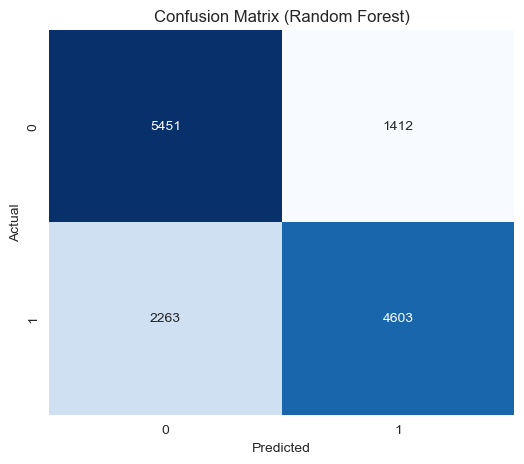

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')

In [20]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)